# Program

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import pickle
%matplotlib inline

In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a8008eafebc34ef19eef15b1eaf4e2a6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ErPZs5OOMquLHlHQsFmg_iXzREfsYzlIYaGi6ut2VaGB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a8008eafebc34ef19eef15b1eaf4e2a6.get_object(Bucket='predictenergyoutput-donotdelete-pr-dekwtntjptgwux',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


# Visualization of data

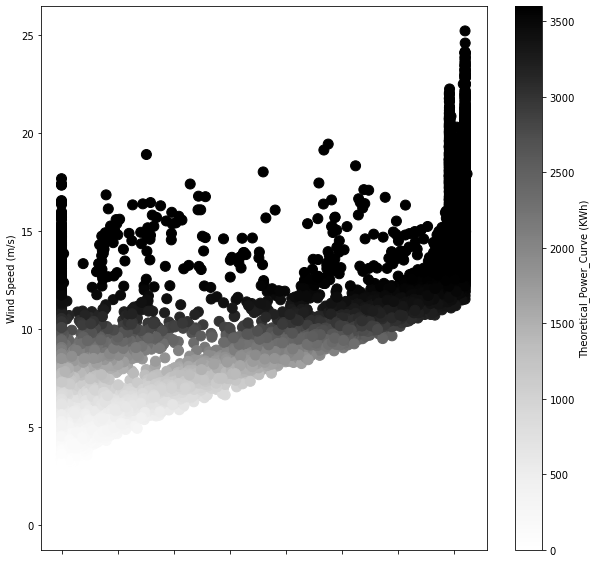

In [4]:
df.plot.scatter(x='LV ActivePower (kW)',y='Wind Speed (m/s)',c='Theoretical_Power_Curve (KWh)',s=100,figsize=(10,10))

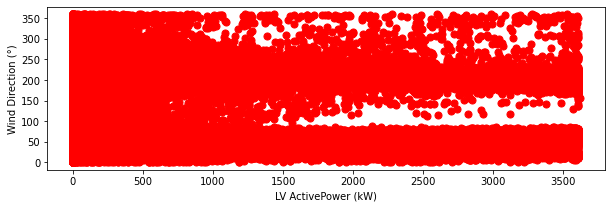

In [7]:
df.plot.scatter(x='LV ActivePower (kW)',y='Wind Direction (°)',c='red',s=50,figsize=(10,3))

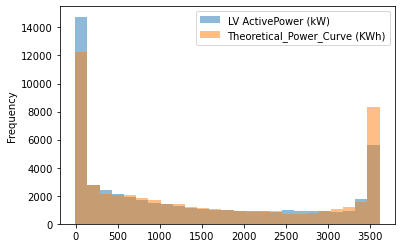

In [4]:
df[['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)']].plot.hist(alpha=0.5,bins=25)

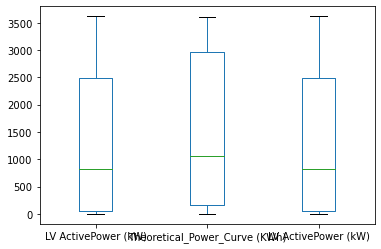

In [5]:
df[['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)', 'LV ActivePower (kW)']].plot.box()

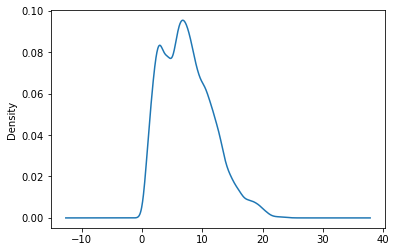

In [6]:
df['Wind Speed (m/s)'].plot.kde()

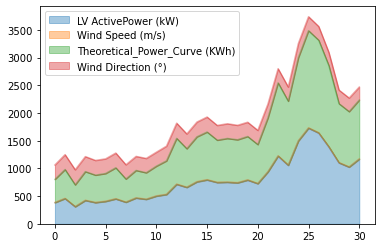

In [7]:
df.loc[0:30].plot.area(alpha=0.4)

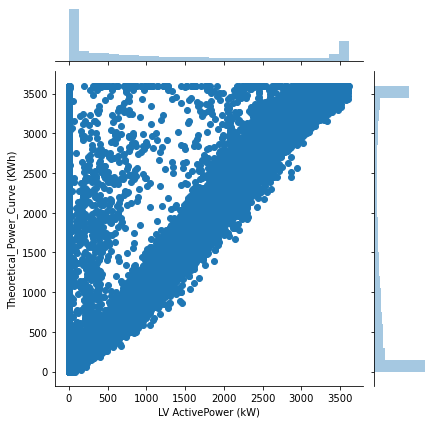

In [8]:
sns.jointplot(x='LV ActivePower (kW)',y='Theoretical_Power_Curve (KWh)',data=df)

Text(0.5, 1.0, 'df.corr()')

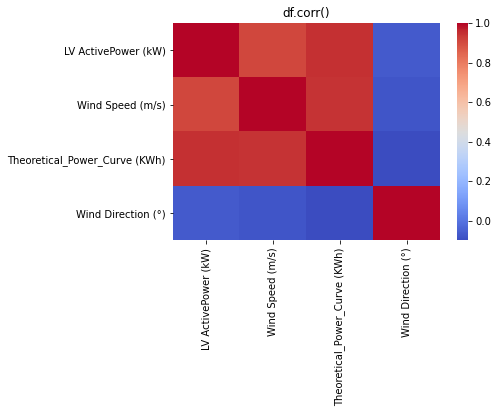

In [9]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('df.corr()')

# Taking care of missing data

In [8]:
df.isnull().sum() 

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [9]:
df.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785


we use df.fillna(df.mean(),inplace=True) in case of missing data.
Since no data is missing so we skip adding data

In [10]:
X = df[['Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (°)']]
y= df['LV ActivePower (kW)']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [13]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

0.8975825374784779
406.9943265364238


In [14]:
y_pred

array([ 480.55572882, 1512.19608813, 1437.99910034, ...,  688.11765845,
       3562.12546826,  609.19082483])

In [15]:
#xgb.save_model("wind_energy.pkl")

In [16]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 11.9 MB/s eta 0:00:01


In [18]:
wml_credentials = {
                      "apikey":"DVhj2VbR9sOF4u80MnIVr58ToyaSEwjNNgUqw-UFkhCi",
                      "url": "https://us-south.ml.cloud.ibm.com"
}

In [19]:
from ibm_watson_machine_learning import APIClient
wml_client = APIClient(wml_credentials)

2020-11-30 11:12:20,228 - ibm_watson_machine_learning.wml_client_error - WARNING - Deployment creation failed for deployment id: d9841413-9274-4047-97f1-d8e9e5242ba4. Errors: [{'code': 'load_model_failure', 'message': '[Errno 12] Cannot allocate memory', 'target': {'type': 'none', 'name': 'none'}, 'more_info': 'none'}]


In [20]:
wml_client.repository.ModelMetaNames.show()

------------------------  ----  --------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
META_PROP NAME            TYPE  REQUIRED  SCHEMA
NAME                      str   Y
DESCRIPTION               str   N
INPUT_DATA_SCHEMA         list  N         {'id(required)': 'string', 'fields(required)': [{'name(required)': 'string', 'type(required)': 'string', 'nullable(optional)': 'string'}]}
TRAINING_DATA_REFERENCES  list  N         [{'name(optional)': 'string', 'type(required)': 'string', 'connection(required)': {'endpoint_url(required)': 'string', 'access_key_id(required)': 'string', 'secret_access_key(required)': 'string'},

In [21]:
def guid_from_space_name(wml_client, space_name):
     instance_details = wml_client.service_instance.get_details()
     space = wml_client.spaces.get_details()
     return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])

In [22]:
space_uid = "794b1c88-e348-4124-83a3-606987653fdc"
#guid_from_space_name(wml_client, 'Deployment of Energy Output').   not working instances not found

In [23]:
wml_client.set.default_space(space_uid)

'SUCCESS'

In [24]:
sw_spec_id = wml_client.software_specifications.get_id_by_name('default_py3.7')
meta_props={
 wml_client.repository.ModelMetaNames.NAME: "EnergyOutputPrediction",
 wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_id,
 wml_client.repository.ModelMetaNames.TYPE: "scikit-learn_0.23",
}

In [25]:
model_artifact = wml_client.repository.store_model(rfc,
                                                meta_props=meta_props,
                                                training_data=X_train,
                                                training_target=y_train)
model_uid = wml_client.repository.get_model_uid(model_artifact)
print("Model UID = " + model_uid)

Model UID = 9c1856c5-85e0-4450-85dd-b3d9d4b2c7fa


In [26]:
model_details = wml_client.repository.get_details(model_uid)
from pprint import pprint
pprint(model_details)

{'entity': {'label_column': 'LV ActivePower (kW)',
            'software_spec': {'id': 'e4429883-c883-42b6-87a8-f419d64088cd',
                              'name': 'default_py3.7'},
            'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
                                                         'endpoint_url': 'not_applicable',
                                                         'secret_access_key': 'not_applicable'},
                                          'id': '1',
                                          'location': {},
                                          'schema': {'fields': [{'name': 'Wind '
                                                                         'Speed '
                                                                         '(m/s)',
                                                                 'type': 'float64'},
                                                                {'name': 'Theoretical_Power_Curv

In [27]:
deploy_meta = {
     wml_client.deployments.ConfigurationMetaNames.NAME: "Predict Energy Output",
     wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
 }

In [ ]:
deployment_details = wml_client.deployments.create(model_uid, meta_props=deploy_meta)



#######################################################################################

Synchronous deployment creation for uid: '9c1856c5-85e0-4450-85dd-b3d9d4b2c7fa' started

#######################################################################################


initializing...

In [62]:
wml_client.deployments.list()

------------------------------------  ---------------------  ------  ------------------------
GUID                                  NAME                   STATE   CREATED
5b4c9138-ae65-4677-a6ec-b0dcd42a3b6c  Predict Energy Output  ready   2020-11-29T19:30:27.266Z
06738816-68e3-4662-8d0c-d054e63740e9  Predict Energy Output  failed  2020-11-29T19:23:18.868Z
3444515c-96c6-49e9-9375-e7e00f6f4fc8  Predict Energy Output  ready   2020-11-29T19:14:15.366Z
------------------------------------  ---------------------  ------  ------------------------


In [63]:
deployment_uid = wml_client.deployments.get_uid(deployment_details)
print('Deployment uid = {}'.format(deployment_uid))

Deployment uid = 5b4c9138-ae65-4677-a6ec-b0dcd42a3b6c


In [68]:
deployment_uid

'5b4c9138-ae65-4677-a6ec-b0dcd42a3b6c'

In [71]:
job_payload = {
   wml_client.deployments.ScoringMetaNames.INPUT_DATA: [{
     'values': X_test[['Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (°)']]
   }]
 }
pprint(job_payload)

{'input_data': [{'values':        Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  Wind Direction (°)
47469          5.952496                     609.081469           73.278328
4456           8.134918                    1608.179354           57.538979
49305          8.207115                    1650.739196          254.491394
48151         11.830910                    3493.172818          176.449707
33422          4.290701                     178.963457           28.394060
...                 ...                            ...                 ...
8099          16.925819                    3600.000000          194.071594
3928          18.784910                    3600.000000          192.759796
13587          6.232595                     705.307389           79.587013
45388         19.025181                    3600.000000          191.954102
11380          6.195017                     691.778311          218.437195

[15159 rows x 3 columns]}]}


In [72]:
job_details = wml_client.deployments.score(deployment_uid,
                                        job_payload)
pprint(job_details)

{'predictions': [{'fields': ['prediction'],
                  'values': [[480.5557288208007],
                             [1512.1960881347654],
                             [1437.9991003417967],
                             [3407.665527832031],
                             [147.696132949829],
                             [0.043439314842224026],
                             [2219.576064819336],
                             [3589.0549716796877],
                             [0.13033267545700059],
                             [0.0],
                             [436.9593820800781],
                             [991.326812011718],
                             [311.8238255310058],
                             [17.848737055607096],
                             [2283.309965209961],
                             [3536.0695644531247],
                             [3351.469114746094],
                             [0.0],
                             [1813.3746856689452],
                         

                             [2880.3682069091797],
                             [3530.32892578125],
                             [196.29688702392576],
                             [3295.319357910156],
                             [121.6171634674072],
                             [9.78666022419928e-05],
                             [1037.273962036132],
                             [3052.631240234375],
                             [0.0],
                             [594.1363031005859],
                             [450.47250250244133],
                             [358.68602355957023],
                             [914.6075866699217],
                             [2554.577830566406],
                             [160.84272653198235],
                             [3435.4250131835934],
                             [332.1035460510253],
                             [193.81421705627434],
                             [3387.831780761718],
                             [2290.4650886230465],
    

                             [3530.498596435547],
                             [349.61722235107413],
                             [1066.0435321502673],
                             [18.428662474632254],
                             [1223.546963623046],
                             [1890.3220949707031],
                             [2633.48000390625],
                             [2549.6061113281244],
                             [340.41653993225094],
                             [2350.87415625],
                             [2418.175021484375],
                             [828.8166369628906],
                             [2354.5546328124997],
                             [1615.1093398437495],
                             [3231.17919921875],
                             [0.0],
                             [21.37186322689055],
                             [1453.4391220703121],
                             [0.0],
                             [528.4967879028319],
                         

                             [1499.0149445800776],
                             [0.7814224827587603],
                             [123.96402290344231],
                             [1705.7495612792968],
                             [468.07412350463864],
                             [375.7189564208984],
                             [2561.757494628906],
                             [0.0],
                             [0.0],
                             [1225.6857991790769],
                             [3351.1442373046875],
                             [973.2828076534267],
                             [127.11403663635247],
                             [1025.37809387207],
                             [131.26707485961904],
                             [0.0],
                             [1958.0572937011714],
                             [2061.684300750732],
                             [1443.482432617187],
                             [1.2347126551866496],
                             [84

                             [442.32374261474604],
                             [87.63650698852534],
                             [1434.858165039062],
                             [0.0],
                             [3132.15016015625],
                             [937.2968581848141],
                             [2602.5153125],
                             [1642.7629479980467],
                             [1314.9472495117186],
                             [213.15825698852535],
                             [2960.9301357421873],
                             [0.0],
                             [3534.156442871093],
                             [421.5310056152344],
                             [37.794004512786856],
                             [0.0],
                             [542.7771293640136],
                             [1989.812601348877],
                             [1023.2494816284177],
                             [1187.5066737670895],
                             [0.0],
    

                             [3394.5025957031244],
                             [1043.4267797851558],
                             [220.45768954467766],
                             [0.0],
                             [96.76704428482049],
                             [3412.478327636719],
                             [1527.7905428466793],
                             [3603.8880307617187],
                             [1131.7810367279046],
                             [1.8878843262195564],
                             [1457.2645177001948],
                             [182.718720626831],
                             [2062.2286656188962],
                             [8.39999970048666e-05],
                             [759.5178515624999],
                             [3341.4791279296874],
                             [19.46851377868652],
                             [2705.354934703827],
                             [1936.9848187255855],
                             [1.4098403850365422],


                             [3569.577837402344],
                             [5.039861365795132],
                             [1708.6762695312495],
                             [160.3709768066405],
                             [347.59595288085933],
                             [992.9914481201166],
                             [1505.971194335937],
                             [7.952025656223295],
                             [1.6979855126440513],
                             [669.1973161621094],
                             [2192.393384277343],
                             [2952.932384765625],
                             [2497.0983646850586],
                             [2675.8416469726562],
                             [3234.1686865234374],
                             [2.4277490091323712],
                             [2123.930956787109],
                             [79.89351210784909],
                             [485.8116514892578],
                             [3098.02613720

                             [592.3839511108397],
                             [530.36852935791],
                             [46.74375270557404],
                             [179.99354919433588],
                             [1909.980826660156],
                             [2598.625349609375],
                             [1398.894904296874],
                             [1067.0423325195304],
                             [0.0],
                             [94.24613848114],
                             [3587.989655273437],
                             [373.4313111572265],
                             [9.343162795186041],
                             [3568.640436035156],
                             [60.031279518127434],
                             [3598.076446777344],
                             [905.8190675048826],
                             [3521.911684570312],
                             [2.348287278652187],
                             [3295.040677734375],
                

In [101]:
import joblib
#save model
joblib.dump(rfc, "wind_energy.pkl") 

#load saved model
m = joblib.load("wind_energy.pkl")

In [103]:
m.predict([[23,56.67,231.54]])

array([1152.91675577])